# Take Home Challeneg-Ultimate Technologies Inc.

###  Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

In [76]:
pwd

'C:\\Users\\zsoltani'

In [77]:

login_df = pd.read_json('logins.json')

In [78]:
login_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [79]:
login_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [80]:
login_df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [81]:
login_df['count'] = 1
login_df.tail()

,login_time,count
93137,1970-04-13 18:50:19,1
93138,1970-04-13 18:43:56,1
93139,1970-04-13 18:54:02,1
93140,1970-04-13 18:57:38,1
93141,1970-04-13 18:54:23,1


In [82]:
login_df.set_index('login_time', inplace=True)
login_df.tail()

,count
login_time,
1970-04-13 18:50:19,1
1970-04-13 18:43:56,1
1970-04-13 18:54:02,1
1970-04-13 18:57:38,1
1970-04-13 18:54:23,1


In [83]:
login_df.sort_index(inplace=True)
login_df_resample = login_df.resample("15min").sum()

In [84]:
login_df_resample.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


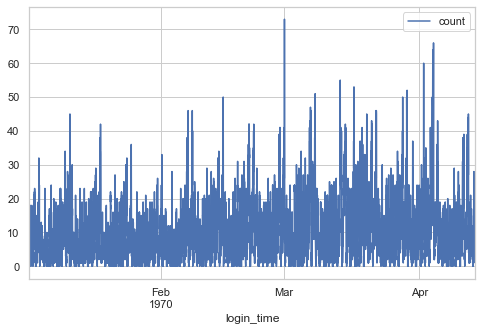

In [85]:
login_df_resample.plot(figsize=(8,5))


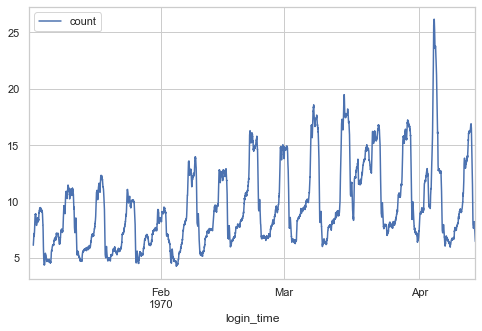

In [86]:
login_df_resample.rolling(window=96).mean().plot(figsize=(8,5))



In [87]:
import datetime

datetime.datetime(1970,3, 30).weekday()


0

30 March 1970 was Monday. I am going to plot Monday to Sunday ( April) this week then.


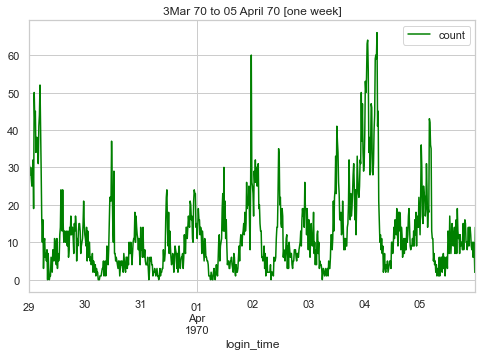

In [88]:

login_df_resample.loc['1970-03-29':'1970-04-05'].plot(figsize=(8,5), color='green')
plt.title('3Mar 70 to 05 April 70 [one week]')
plt.show()

As can be seen around weekend (April 4&5) we have increase in demand.

in the below graph I have created a smoother graph to examin the demand in the last week of March to early April.

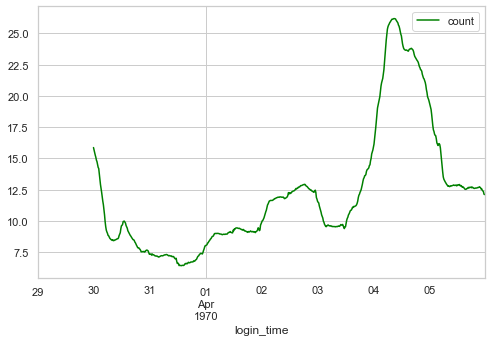

In [89]:
login_df_resample.loc['1970-03-29':'1970-04-05'].rolling(window=96).mean().plot(figsize=(8,5),color='green')

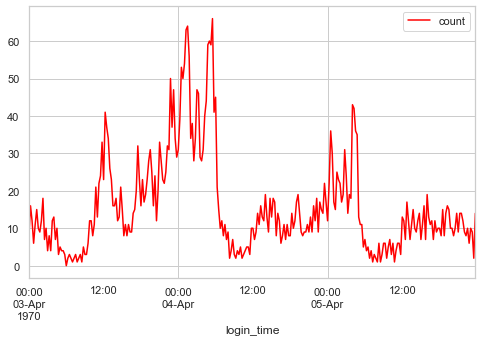

In [90]:
login_df_resample.loc['1970-04-03':'1970-04-05'].plot(figsize=(8,5), color='red')

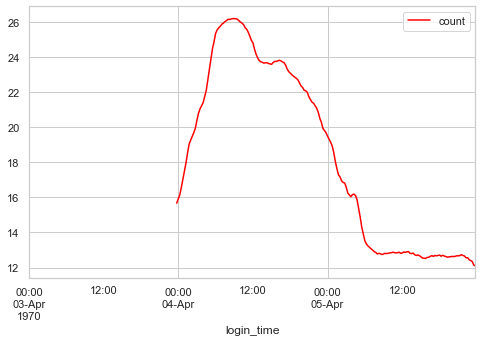

In [91]:
login_df_resample.loc['1970-04-03':'1970-04-05'].rolling(window=96).mean().plot(figsize=(8,5), color='red')

### Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

In [184]:
ultimate = pd.read_json('ultimate_data_challenge.json')

● city: city this user signed up in
● phone: primary device for this user
● signup_date: date of account registration; in the form ‘YYYY MM DD’
● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
● avg_dist: the average distance in miles per trip taken in the first 30 days after signup
● avg_rating_by_driver: the rider’s average rating over all of their trips
● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
● surge_pct: the percent of trips taken with surge multiplier > 1
● avg_surge: The average surge multiplier over all of this user’s trips
● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
● weekday_pct: the percent of the user’s trips occurring during a weekday

In [185]:
ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [186]:
ultimate .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


### Part 3 ‑ Predictive modeling


Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

ultimate.describe()

In [187]:
ultimatepv = ultimate.pivot_table(index=ultimate['city'], aggfunc='size')

In [188]:
ultimatepv.head()

city
Astapor           16534
King's Landing    10130
Winterfell        23336
dtype: int64

In [189]:
ultimate['last_trip_date'] = pd.to_datetime(ultimate['last_trip_date'], errors='coerce',format='%Y-%m-%d')

I am going to calculate the days passed from the last trip for each User

In [190]:
latest = max(ultimate['last_trip_date'])
ultimate['Days with no trip'] = latest - ultimate['last_trip_date']
ultimate['Days with no trip'] = ultimate['Days with no trip'].dt.days

In [191]:
import datetime

In [192]:
ultimate['last_trip_day']=ultimate['last_trip_date'].apply(lambda x: datetime.date(x.year,x.month,x.day).strftime('%A'))

In [193]:
ultimate['last_trip_Month']=ultimate['last_trip_date'].apply(lambda x: datetime.date(x.year,x.month,x.day).strftime('%B'))

In [194]:
ultimate['last_trip_day'].unique()

array(['Tuesday', 'Monday', 'Sunday', 'Saturday', 'Friday', 'Wednesday',
       'Thursday'], dtype=object)

My target would be binary referring to whether or not customers were “active” (i.e. took a trip) in the preceding 30 days.

In [195]:
ultimate["retained"]=ultimate['Days with no trip'].apply(lambda x: 1 if x<=30 else 0)

In [196]:
type(ultimate["last_trip_date"])

pandas.core.series.Series

In [197]:
ultimate.tail(15)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Days with no trip,last_trip_day,last_trip_Month,retained
49985,Astapor,1,2014-01-26,NaN,1.00,2014-02-25,Android,0.0,False,100.0,1.38,5.0,126,Tuesday,February,0
49986,Winterfell,0,2014-01-21,4.0,1.00,2014-05-23,Android,0.0,False,100.0,0.52,5.0,39,Friday,May,0
49987,Winterfell,3,2014-01-27,4.6,1.00,2014-05-31,iPhone,0.0,False,80.0,4.24,4.0,31,Saturday,May,0
49988,King's Landing,1,2014-01-20,4.5,1.00,2014-06-14,iPhone,0.0,False,50.0,2.53,5.0,17,Saturday,June,1
49989,Winterfell,1,2014-01-24,NaN,1.00,2014-01-31,iPhone,0.0,False,100.0,0.00,5.0,151,Friday,January,0
49990,Astapor,1,2014-01-13,4.7,1.08,2014-05-18,iPhone,33.3,True,33.3,3.38,5.0,44,Sunday,May,0
49991,Winterfell,0,2014-01-08,5.0,1.25,2014-06-29,iPhone,100.0,False,0.0,1.06,5.0,2,Sunday,June,1
49992,King's Landing,1,2014-01-18,1.0,1.00,2014-01-19,iPhone,0.0,False,0.0,7.58,5.0,163,Sunday,January,0
49993,Astapor,3,2014-01-03,4.8,1.11,2014-07-01,iPhone,11.1,True,55.6,2.53,4.7,0,Tuesday,July,1
49994,Astapor,1,2014-01-03,4.6,1.44,2014-05-31,iPhone,37.5,False,25.0,2.25,4.5,31,Saturday,May,0


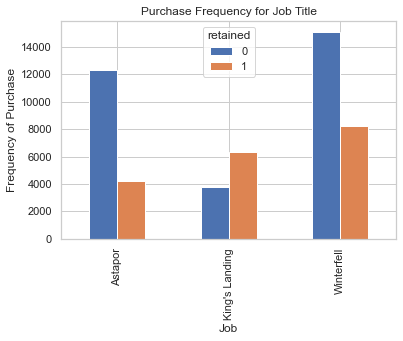

In [198]:
pd.crosstab(ultimate.city,ultimate.retained).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

Text(0, 0.5, 'Proportion of ratained')

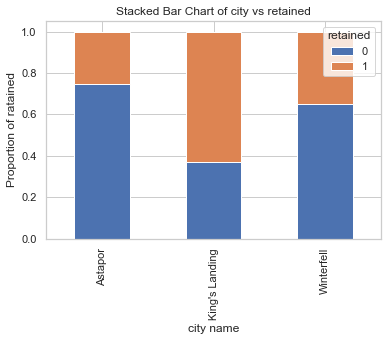

In [199]:
table=pd.crosstab(ultimate.city,ultimate.retained)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of city vs retained')
plt.xlabel('city name')
plt.ylabel('Proportion of ratained')

Text(0, 0.5, 'Proportion of ratained')

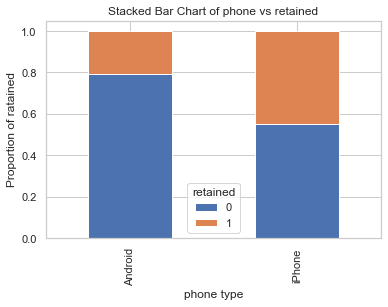

In [200]:
table=pd.crosstab(ultimate.phone,ultimate.retained)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of phone vs retained')
plt.xlabel('phone type')
plt.ylabel('Proportion of ratained')


Text(0, 0.5, 'Proportion of ratained')

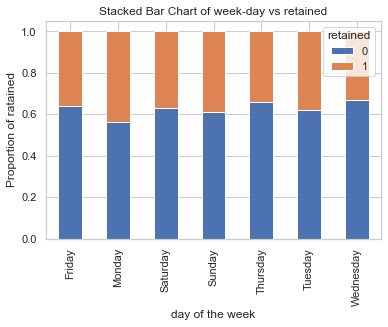

In [201]:
table=pd.crosstab(ultimate.last_trip_day,ultimate.retained)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of week-day vs retained')
plt.xlabel('day of the week')
plt.ylabel('Proportion of ratained')


Text(0, 0.5, 'Proportion of ratained')

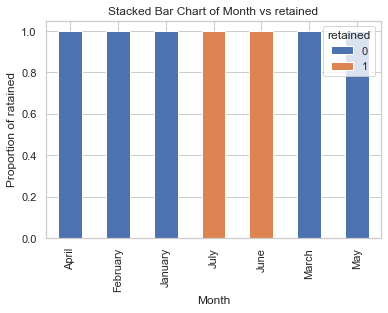

In [202]:
table=pd.crosstab(ultimate.last_trip_Month,ultimate.retained)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Month vs retained')
plt.xlabel('Month')
plt.ylabel('Proportion of ratained')

based on the above graph it seems that the month of the last trip doesnot have predictive value, and since all data are in 2014 I am going to drop Last Trip Date from the dataset and keep the dday of the week only

In [203]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  object        
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  Days with no trip       50000 non-null  int64 

In [204]:
ultimate.drop(['last_trip_date'], axis=1, inplace=True)

In [205]:
ultimate.drop(['last_trip_Month'], axis=1, inplace=True)

In [206]:
ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Days with no trip,last_trip_day,retained
0,King's Landing,4,2014-01-25,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,14,Tuesday,1
1,Astapor,0,2014-01-29,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,57,Monday,0
2,Astapor,3,2014-01-06,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,175,Tuesday,0
3,King's Landing,9,2014-01-10,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,2,Sunday,1
4,Winterfell,14,2014-01-27,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,108,Saturday,0


Now I am going to create the heatmap and examine the correlation between the features

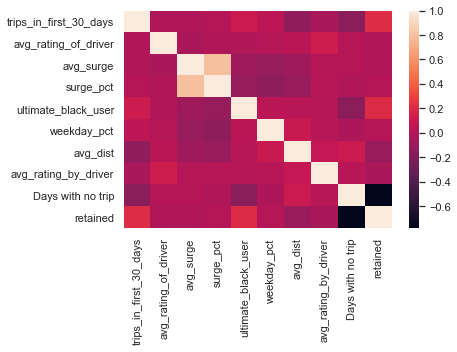

In [207]:
fig = plt.figure()
ax = plt.subplot(111)
corr = ultimate.corr()
ax = sns.heatmap(corr)
plt.show()

In [208]:
corr['retained'].sort_values(ascending=False)

retained                  1.000000
trips_in_first_30_days    0.210463
ultimate_black_user       0.205002
surge_pct                 0.011797
weekday_pct               0.009693
avg_surge                -0.003333
avg_rating_of_driver     -0.011653
avg_rating_by_driver     -0.026791
avg_dist                 -0.092780
Days with no trip        -0.780837
Name: retained, dtype: float64

In [209]:
corr['weekday_pct'].sort_values(ascending=False)

weekday_pct               1.000000
avg_dist                  0.101652
trips_in_first_30_days    0.050388
ultimate_black_user       0.035998
avg_rating_by_driver      0.020442
avg_rating_of_driver      0.014630
retained                  0.009693
Days with no trip        -0.021589
avg_surge                -0.110071
surge_pct                -0.144918
Name: weekday_pct, dtype: float64

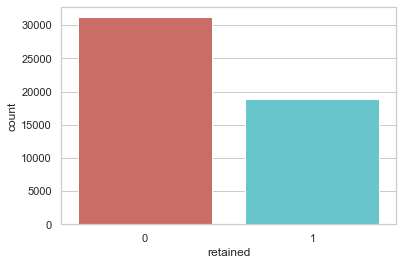

In [210]:
sns.countplot(x='retained', data=ultimate, palette='hls')

plt.show()
#imbalanced dataset

In [211]:
ultimate.groupby('retained').mean()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Days with no trip
retained,,,,,,,,,
0,1.658482,4.607557,1.075339,8.666739,0.299942,60.647032,6.207939,4.787464,110.080651
1,3.306318,4.592930,1.073809,9.152797,0.505052,61.389034,5.114788,4.762772,10.592693


In [212]:
ultimate.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
Days with no trip            0
last_trip_day                0
retained                     0
dtype: int64

In [213]:
ultimate=ultimate.dropna()

In [214]:
ultimate.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
Days with no trip         0
last_trip_day             0
retained                  0
dtype: int64

In [215]:
ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Days with no trip,last_trip_day,retained
0,King's Landing,4,2014-01-25,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,14,Tuesday,1
1,Astapor,0,2014-01-29,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,57,Monday,0
2,Astapor,3,2014-01-06,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,175,Tuesday,0
3,King's Landing,9,2014-01-10,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,2,Sunday,1
4,Winterfell,14,2014-01-27,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,108,Saturday,0


In [216]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    41445 non-null  object 
 1   trips_in_first_30_days  41445 non-null  int64  
 2   signup_date             41445 non-null  object 
 3   avg_rating_of_driver    41445 non-null  float64
 4   avg_surge               41445 non-null  float64
 5   phone                   41445 non-null  object 
 6   surge_pct               41445 non-null  float64
 7   ultimate_black_user     41445 non-null  bool   
 8   weekday_pct             41445 non-null  float64
 9   avg_dist                41445 non-null  float64
 10  avg_rating_by_driver    41445 non-null  float64
 11  Days with no trip       41445 non-null  int64  
 12  last_trip_day           41445 non-null  object 
 13  retained                41445 non-null  int64  
dtypes: bool(1), float64(6), int64(3), obje

I am going to change the signup date to int and calculate its correltion with the target variable

In [217]:
ultimate.signup_date = pd.to_datetime(ultimate.signup_date)

In [218]:
ultimate['signup_date'] = ultimate['signup_date'].dt.strftime('%Y%m%d').astype(int) - 20140100


In [219]:
ultimate['signup_date'].corr(ultimate['retained'])

-0.016242700813897965

Based on the analysis above, we see very small correlation between signup_date and the retained. So I am going to drop "signup_date".

In [220]:
ultimate.drop(['Days with no trip','signup_date'], axis=1, inplace=True)

In [221]:
ultimate.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,last_trip_day,retained
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,Tuesday,1
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,Monday,0
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,Tuesday,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,Sunday,1
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,Saturday,0


In [222]:
# before starting the modeling I am going to chage the type of the 'ultimate black user" to int.
ultimate['ultimate_black_user'] = ultimate['ultimate_black_user']*1

In [223]:
#cities_ohe = pd.get_dummies(ultimate['city'])
#phones_ohe = pd.get_dummies(ultimate['phone'])
#last_trip_day_ohe = pd.get_dummies(ultimate['last_trip_day'])

In [224]:
#ultimate = ultimate.join(cities_ohe).join(phones_ohe).join(last_trip_day_ohe)

In [225]:
#ultimate.drop(['city', 'phone','last_trip_day'], axis=1, inplace=True)

In [226]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    41445 non-null  object 
 1   trips_in_first_30_days  41445 non-null  int64  
 2   avg_rating_of_driver    41445 non-null  float64
 3   avg_surge               41445 non-null  float64
 4   phone                   41445 non-null  object 
 5   surge_pct               41445 non-null  float64
 6   ultimate_black_user     41445 non-null  int32  
 7   weekday_pct             41445 non-null  float64
 8   avg_dist                41445 non-null  float64
 9   avg_rating_by_driver    41445 non-null  float64
 10  last_trip_day           41445 non-null  object 
 11  retained                41445 non-null  int64  
dtypes: float64(6), int32(1), int64(2), object(3)
memory usage: 4.0+ MB


Steps Involved in Classification in Scikit-Learn
1.Preprocess Data
2.Create Train and Test Sets
3.Instantiate the model/estimator
(Steps 1 and 3 can be combined in a Pipeline object)
4.Specify Hyperparameter Space
5.Instantiate GridSearchCV or RandomizedSearchCV objects
6.Fit CV object to the Training Set
7.Predict on the Test Set
8.Compute Scores for the Model


Models:

Logistic Regression (LR)
K-Nearest Neighbor (KNN)
Support Vector Machine (SVM)
Decision Trees (DT)
Random Forest (RF)
Naive Bayes (NB

In [245]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, precision_recall_curve
import time

In [228]:

categorical_features = ['city', 'phone','last_trip_day']

numeric_features = [column for column in ultimate.columns.tolist() if column not in categorical_features and
                    column not in ['retained']]


In [229]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

In [230]:

    dummies_city = pd.get_dummies(ultimate['city'])
    dummies_phone = pd.get_dummies(ultimate['phone'])
    dummies_day = pd.get_dummies(ultimate['last_trip_day'])
    
    res = pd.concat([ultimate, dummies_city,dummies_phone,dummies_day], axis=1)
    res = res.drop(['city', 'phone','last_trip_day'], axis=1)



In [231]:
res.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,Astapor,...,Winterfell,Android,iPhone,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,0,1,...,0,1,0,0,1,0,0,0,0,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,1,0,...,0,0,1,0,0,0,1,0,0,0
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,0,0,...,1,1,0,0,0,1,0,0,0,0


Test-Train split of the dataset

In [232]:
X = res.drop(['retained'], axis=1)
y = res['retained']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

1- Logistic Regression (dependent variable is binary)

In [233]:
from sklearn.linear_model import LogisticRegression

In [234]:
#https://towardsdatascience.com/grid-search-for-model-tuning-3319b259367e

In [235]:
# Gridsearch and Train (Hyperparameter Tuning)

logreg = LogisticRegression()
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
model_cv = GridSearchCV(logreg, param_grid=grid_values)
model_cv.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",model_cv.best_params_)
print("accuracy :",model_cv.best_score_)

C:\Users\zsoltani\Anaconda3\envs\ZSPython\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zsoltani\Anaconda3\envs\ZSPython\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zsoltani\Anaconda3\envs\ZSPython\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\zsoltani\Anaconda3\envs\ZSPython\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\zsoltani\Anaconda3\envs\ZSPython\lib\site-packages\sklearn\linear_model\

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.7082141539907651


C:\Users\zsoltani\Anaconda3\envs\ZSPython\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [236]:
#Predict on Test
y_pred = model_cv.predict(X_test)

In [239]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

#Logistic Regression Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.7061283577288081
Precision Score : 0.6823529411764706
Recall Score : 0.5333594208569752
F1 Score : 0.5987261146496816
Confusion Matrix : 
[[6054 1269]
 [2385 2726]]


In [253]:
def Conf_Matrix(CM, labels=['Not Retained', 'Retained']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name = 'TRUE'
    df.columns.name = 'PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          6054      1269   7323
Retained              2385      2726   5111
Total                 8439      3995  12434
              precision    recall  f1-score   support

           0       0.72      0.83      0.77      7323
           1       0.68      0.53      0.60      5111

    accuracy                           0.71     12434
   macro avg       0.70      0.68      0.68     12434
weighted avg       0.70      0.71      0.70     12434



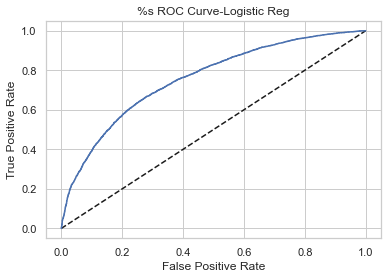

In [254]:
print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))

# ROC Curve
y_pred_prob = model_cv.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic_Reg')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('%s ROC Curve-Logistic Reg' )
plt.show()

In [273]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

In [277]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid=[
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

In [278]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
classifier_rf = RandomForestClassifier(random_state=0)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = classifier_rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,  y_train)

C:\Users\zsoltani\Anaconda3\envs\ZSPython\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   23.2s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 50, None],
                                         'max_features': [5, 10],
                                         'n_estimators': [10, 25]}],
                   random_state=42, verbose=2)

In [279]:
y_pred_rf = rf_random.predict(X_test)

PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          6176      1147   7323
Retained              1634      3477   5111
Total                 7810      4624  12434
              precision    recall  f1-score   support

           0       0.79      0.84      0.82      7323
           1       0.75      0.68      0.71      5111

    accuracy                           0.78     12434
   macro avg       0.77      0.76      0.77     12434
weighted avg       0.77      0.78      0.77     12434



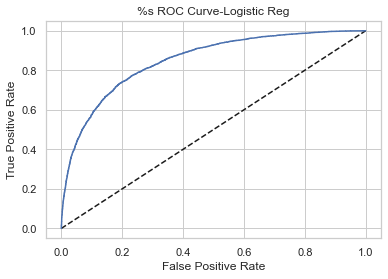

In [280]:
print(Conf_Matrix(confusion_matrix(y_test, y_pred_rf)))
print(classification_report(y_test, y_pred_rf))

# ROC Curve
y_pred_probrf = rf_random.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_probrf)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic_Reg')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('%s ROC Curve-Logistic Reg' )
plt.show()